In [20]:
# Part f) Model Development & Part g) Fine-Tuning

import os
import tarfile
import urllib
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse

# gathering the dataset

PATH = "arp_mitm"

FILE = "ARP MitM_dataset-002.csv"
L_FILE = "ARP MitM_labels.csv"

csv_path = os.path.join(PATH, FILE)
dataset = pd.read_csv(csv_path, header=None)  

display(dataset.head())
display(dataset.info())
display(dataset.describe())

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
0,1.000000,1294.0,0.000000e+00,1.000000,1294.0,0.000000e+00,1.000000,1294.0,0.000000e+00,1.000000,...,0.000000e+00,0.0,0.0,1.000000,1294.0,0.000000,1294.0,0.000000e+00,0.0,0.0
1,1.000000,1514.0,0.000000e+00,1.000000,1514.0,0.000000e+00,1.000000,1514.0,0.000000e+00,1.000000,...,0.000000e+00,0.0,0.0,1.000000,1514.0,0.000000,1514.0,0.000000e+00,0.0,0.0
2,1.999505,1294.0,6.984919e-10,1.999703,1294.0,2.328306e-10,1.999901,1294.0,6.984919e-10,1.999990,...,0.000000e+00,0.0,0.0,1.999999,1294.0,0.000000,1294.0,0.000000e+00,0.0,0.0
3,2.998985,1294.0,9.313226e-10,2.999391,1294.0,4.656613e-10,2.999797,1294.0,6.984919e-10,2.999980,...,6.984919e-10,0.0,0.0,2.999998,1294.0,0.000015,1294.0,2.328306e-10,0.0,0.0
4,3.998061,1294.0,9.313226e-10,3.998836,1294.0,2.328306e-10,3.999612,1294.0,6.984919e-10,3.999961,...,2.328306e-10,0.0,0.0,3.999996,1294.0,0.000000,1294.0,0.000000e+00,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2504267 entries, 0 to 2504266
Columns: 115 entries, 0 to 114
dtypes: float64(115)
memory usage: 2.1 GB


None

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
count,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,...,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06,2.504267e+06
mean,3.161843e+02,1.263429e+03,1.629564e+05,5.206959e+02,1.263908e+03,1.624291e+05,1.542137e+03,1.264399e+03,1.618282e+05,1.508207e+04,...,1.618792e+05,-2.279080e-03,-7.277519e-07,2.433348e+04,1.264685e+03,3.848150e+02,1.319794e+03,1.617353e+05,-2.131455e-03,-5.309278e-07
std,1.261311e+02,2.731945e+02,4.387131e+04,2.018029e+02,2.730516e+02,4.250538e+04,5.917664e+02,2.729755e+02,4.140203e+04,5.965275e+03,...,4.570896e+04,1.849400e+00,6.071145e-04,6.679195e+03,2.771983e+02,1.050558e+02,7.498082e+01,4.563698e+04,1.538249e+00,5.666412e-04
min,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,...,0.000000e+00,-1.464452e+03,-4.688243e-01,1.000000e+00,6.000000e+01,0.000000e+00,6.000000e+01,0.000000e+00,-8.329919e+02,-2.887023e-01
25%,1.893583e+02,1.302018e+03,1.490105e+05,3.071747e+02,1.301232e+03,1.466209e+05,8.890711e+02,1.297967e+03,1.435192e+05,8.741032e+03,...,1.793071e+05,0.000000e+00,0.000000e+00,2.347740e+04,1.335240e+03,4.248047e+02,1.335240e+03,1.804590e+05,0.000000e+00,0.000000e+00
50%,3.604483e+02,1.328082e+03,1.727128e+05,6.178137e+02,1.331693e+03,1.754399e+05,1.921768e+03,1.336063e+03,1.789780e+05,1.945002e+04,...,1.809940e+05,0.000000e+00,0.000000e+00,2.763519e+04,1.340819e+03,4.254162e+02,1.340819e+03,1.809789e+05,0.000000e+00,0.000000e+00
75%,4.041041e+02,1.342751e+03,1.882200e+05,6.662270e+02,1.342305e+03,1.863478e+05,1.974742e+03,1.341165e+03,1.843493e+05,1.964070e+04,...,1.821485e+05,0.000000e+00,0.000000e+00,2.802381e+04,1.341263e+03,4.259399e+02,1.341263e+03,1.814248e+05,0.000000e+00,0.000000e+00
max,5.365877e+02,1.514000e+03,4.942291e+05,8.073135e+02,1.514000e+03,4.948259e+05,2.124893e+03,1.514000e+03,4.953075e+05,1.983936e+04,...,4.257562e+05,7.038125e+01,8.482200e-02,3.091260e+04,1.514000e+03,6.525000e+02,1.514000e+03,4.257562e+05,3.335587e+02,1.560442e-01


In [4]:
# gathering classified output data for dataset

L_csv_path = os.path.join(PATH, L_FILE)
dataset_L = pd.read_csv(L_csv_path, dtype={"": int, "x": 'float64'})  

display(dataset_L.head())
display(dataset_L.info())
display(dataset_L.describe())

,Unnamed: 0,x
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2504267 entries, 0 to 2504266
Data columns (total 2 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   x           float64
dtypes: float64(1), int64(1)
memory usage: 38.2 MB


None

,Unnamed: 0,x
count,2.504267e+06,2.504267e+06
mean,1.252134e+06,4.573282e-01
std,7.229198e+05,4.981759e-01
min,1.000000e+00,0.000000e+00
25%,6.260675e+05,0.000000e+00
50%,1.252134e+06,0.000000e+00
75%,1.878200e+06,1.000000e+00
max,2.504267e+06,1.000000e+00


In [5]:
# NO FEATURE SELECTION
# gathering testing and training data
x_train, x_test, y_train, y_test = train_test_split(dataset, dataset_L.drop('Unnamed: 0', axis=1))

In [6]:
# NO FEATURE SELECTION
# running Random Forest Classifier and training the model using fit with the training data
rfc = RandomForestClassifier(n_jobs=12)
rfc.fit(x_train,y_train.values.ravel())

RandomForestClassifier(n_jobs=12)

In [7]:
# NO FEATURE SELECTION
# predicting the training and test data
y_tr_pred = rfc.predict(x_train)
y_pred = rfc.predict(x_test)

In [25]:
# NO FEATURE SELECTION
# finding training and testing mse for the predictions found in the previous lines of code
print("Training MSE = ", mse(y_tr_pred,y_train))
print("Testing MSE = ", mse(y_pred,y_test))

Training MSE =  0.0
Testing MSE =  7.98636567651705e-06


In [8]:
# NO FEATURE SELECTION
# finding the classification reports and accuracy scores for the training and testing datasets
print("\nTRAINING DATA:")
print(classification_report(y_train, y_tr_pred, target_names=['not malicous', 'malicous']))
print(metrics.accuracy_score(y_train, y_tr_pred))

print("\nTEST DATA:")
print(classification_report(y_test, y_pred, target_names=['not malicous', 'malicous']))
print(metrics.accuracy_score(y_test, y_pred))


TRAINING DATA:
              precision    recall  f1-score   support

not malicous       1.00      1.00      1.00   1018789
    malicous       1.00      1.00      1.00    859411

    accuracy                           1.00   1878200
   macro avg       1.00      1.00      1.00   1878200
weighted avg       1.00      1.00      1.00   1878200

1.0

TEST DATA:
              precision    recall  f1-score   support

not malicous       1.00      1.00      1.00    340206
    malicous       1.00      1.00      1.00    285861

    accuracy                           1.00    626067
   macro avg       1.00      1.00      1.00    626067
weighted avg       1.00      1.00      1.00    626067

0.9999920136343234


In [9]:
# NO FEATURE SELECTION
# confusion matrices for training and testing set
print("Number of 0's and 1's in y_train dataset:")
print(y_train['x'].value_counts())
print("\nCONFUSION MATRIX FOR TRAINING SET: \n {}".format(confusion_matrix(y_train, y_tr_pred)))

print("\nNumber of 0's and 1's in y_test dataset:")
print(y_test['x'].value_counts())
print("\nCONFUSION MATRIX FOR TESTING SET: \n {}".format(confusion_matrix(y_test, y_pred)))

Number of 0's and 1's in y_train dataset:
0.0    1018789
1.0     859411
Name: x, dtype: int64

CONFUSION MATRIX FOR TRAINING SET: 
 [[1018789       0]
 [      0  859411]]

Number of 0's and 1's in y_test dataset:
0.0    340206
1.0    285861
Name: x, dtype: int64

CONFUSION MATRIX FOR TESTING SET: 
 [[340204      2]
 [     3 285858]]


In [10]:
# EXTRA TREES CLASSIFIER FEATURE SELECTION
# gathering testing and training data

feature_list_etc=[12, 13, 27, 28, 58, 63, 77, 78, 108, 109]
x1_train, x1_test, y1_train, y1_test = train_test_split(dataset.iloc[:,feature_list_etc], dataset_L.drop('Unnamed: 0', axis=1))

In [11]:
# EXTRA TREES CLASSIFIER FEATURE SELECTION
# running Random Forest Classifier and training the model using fit with the training data

rfc1 = RandomForestClassifier(n_jobs=12)
rfc1.fit(x1_train,y1_train.values.ravel())

RandomForestClassifier(n_jobs=12)

In [12]:
# EXTRA TREES CLASSIFIER FEATURE SELECTION
# predicting the training and test data

y1_tr_pred = rfc1.predict(x1_train)
y1_pred = rfc1.predict(x1_test)

In [24]:
# part h) training mse and test mse

# EXTRA TREES CLASSIFIER FEATURE SELECTION
# finding training and testing mse for the predictions found in the previous lines of code

print("Training MSE = ", mse(y1_tr_pred,y1_train))
print("Testing MSE = ", mse(y1_pred,y1_test))

Training MSE =  0.0
Testing MSE =  7.98636567651705e-06


In [13]:
# part h) accuracy scores

# EXTRA TREES CLASSIFIER FEATURE SELECTION
# finding the classification reports and accuracy scores for the training and testing datasets

print("\nTRAINING DATA:")
print(classification_report(y1_train, y1_tr_pred, target_names=['not malicous', 'malicous']))
print(metrics.accuracy_score(y1_train, y1_tr_pred))

print("\nTEST DATA:")
print(classification_report(y1_test, y1_pred, target_names=['not malicous', 'malicous']))
print(metrics.accuracy_score(y1_test, y1_pred))


TRAINING DATA:
              precision    recall  f1-score   support

not malicous       1.00      1.00      1.00   1018758
    malicous       1.00      1.00      1.00    859442

    accuracy                           1.00   1878200
   macro avg       1.00      1.00      1.00   1878200
weighted avg       1.00      1.00      1.00   1878200

1.0

TEST DATA:
              precision    recall  f1-score   support

not malicous       1.00      1.00      1.00    340237
    malicous       1.00      1.00      1.00    285830

    accuracy                           1.00    626067
   macro avg       1.00      1.00      1.00    626067
weighted avg       1.00      1.00      1.00    626067

0.9999920136343234


In [16]:
# part h) Confusion Matrices

# EXTRA TREES CLASSIFIER FEATURE SELECTION
# confusion matrices for training and testing set

print("Number of 0's and 1's in y_train dataset:")
print(y1_train['x'].value_counts())
print("\nCONFUSION MATRIX FOR TRAINING SET: \n {}".format(confusion_matrix(y1_train, y1_tr_pred)))

print("\nNumber of 0's and 1's in y_test dataset:")
print(y1_test['x'].value_counts())
print("\nCONFUSION MATRIX FOR TESTING SET: \n {}".format(confusion_matrix(y1_test, y1_pred)))

Number of 0's and 1's in y_train dataset:
0.0    1018758
1.0     859442
Name: x, dtype: int64

CONFUSION MATRIX FOR TRAINING SET: 
 [[1018758       0]
 [      0  859442]]

Number of 0's and 1's in y_test dataset:
0.0    340237
1.0    285830
Name: x, dtype: int64

CONFUSION MATRIX FOR TESTING SET: 
 [[340235      2]
 [     3 285827]]


In [14]:
# SELECT K BEST FEATURE SELECTION
# gathering testing and training data

feature_list_skb=[12, 13, 27, 28, 63, 56, 77, 88, 108, 101]
x2_train, x2_test, y2_train, y2_test = train_test_split(dataset.iloc[:,feature_list_skb], dataset_L.drop('Unnamed: 0', axis=1))

In [15]:
# SELECT K BEST FEATURE SELECTION
# running Random Trees Classifier and training the model using fit with the training data

rfc2 = RandomForestClassifier(n_jobs=12)
rfc2.fit(x2_train,y2_train.values.ravel())

RandomForestClassifier(n_jobs=12)

In [17]:
# SELECT K BEST FEATURE SELECTION
# predicting the training and test data

y2_tr_pred = rfc2.predict(x2_train)
y2_pred = rfc2.predict(x2_test)

In [23]:
# part h) training mse and test mse

# SELECT K BEST FEATURE SELECTION
# finding training and testing mse for the predictions found in the previous lines of code

print("Training MSE = ", mse(y2_tr_pred,y2_train))
print("Testing MSE = ", mse(y2_pred,y2_test))

Training MSE =  0.0
Testing MSE =  1.277818508242728e-05


In [18]:
# part h) accuracy scores

# SELECT K BEST FEATURE SELECTION
# finding the classification reports and accuracy scores for the training and testing datasets

print("\nTRAINING DATA:")
print(classification_report(y2_train, y2_tr_pred, target_names=['not malicous', 'malicous']))
print(metrics.accuracy_score(y2_train, y2_tr_pred))

print("\nTEST DATA:")
print(classification_report(y2_test, y2_pred, target_names=['not malicous', 'malicous']))
print(metrics.accuracy_score(y2_test, y2_pred))


TRAINING DATA:
              precision    recall  f1-score   support

not malicous       1.00      1.00      1.00   1019492
    malicous       1.00      1.00      1.00    858708

    accuracy                           1.00   1878200
   macro avg       1.00      1.00      1.00   1878200
weighted avg       1.00      1.00      1.00   1878200

1.0

TEST DATA:
              precision    recall  f1-score   support

not malicous       1.00      1.00      1.00    339503
    malicous       1.00      1.00      1.00    286564

    accuracy                           1.00    626067
   macro avg       1.00      1.00      1.00    626067
weighted avg       1.00      1.00      1.00    626067

0.9999872218149176


In [19]:
# part h) Confusion Matrices

# SELECT K BEST FEATURE SELECTION
# confusion matrices for training and testing set

print("Number of 0's and 1's in y_train dataset:")
print(y2_train['x'].value_counts())
print("\nCONFUSION MATRIX FOR TRAINING SET: \n {}".format(confusion_matrix(y1_train, y1_tr_pred)))

print("\nNumber of 0's and 1's in y_test dataset:")
print(y2_test['x'].value_counts())
print("\nCONFUSION MATRIX FOR TESTING SET: \n {}".format(confusion_matrix(y1_test, y1_pred)))

Number of 0's and 1's in y_train dataset:
0.0    1019492
1.0     858708
Name: x, dtype: int64

CONFUSION MATRIX FOR TRAINING SET: 
 [[1018758       0]
 [      0  859442]]

Number of 0's and 1's in y_test dataset:
0.0    339503
1.0    286564
Name: x, dtype: int64

CONFUSION MATRIX FOR TESTING SET: 
 [[340235      2]
 [     3 285827]]


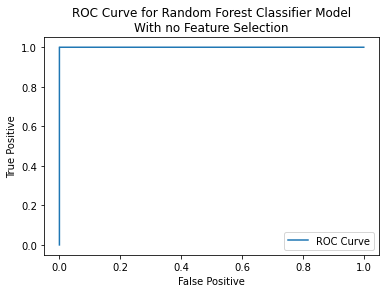

In [28]:
# Part h) ROC curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

rfc_roc = rfc.predict_proba(x_test)

false_pos, true_pos, throwaway= roc_curve(y_test, rfc_roc[:, 1])

plt.plot(false_pos, true_pos, label='ROC Curve')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title("ROC Curve for Random Forest Classifier Model\nWith no Feature Selection")
plt.legend()
plt.show()